### **Application to analyze the credit history and other related factors to predict customer loan eligibility, using Machine Learning Models**

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

#Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#Importing Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import tree

c:\Users\vasan\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\vasan\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

### **Introduction**
##### In this Jupyter notebook, we will be analyzing data and build models based on several factors, to help predict customer loan eligibility. We will train the models and test to see which is the most efficient and accurate model to use for our predictions.<br> Further an application is developed to automate the loan eligibility process in real time based on the information provided by the customer applying for a loan.

##### **Exploratory Data Analysis**

##### Data loading

In [2]:
# Loading the dataset into a dataframe
loan = pd.read_csv('loan.csv')

In [3]:
# A quick look at the loan data
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##### Data exploration

In [4]:
# Description of the loan data
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Information about the loan data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Checking the number of rows and columns
loan.shape

(614, 13)

In [7]:
# Get the column names
loan_columns = loan.columns
print(loan_columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [8]:
# Function to explore data types of the columns and the count
def explore_data(df, feature):
    print(df[feature].value_counts())
    print(df[feature].dtype)

In [9]:
# Explore the data
for featureName in loan_columns:
      print('\n"' + str(featureName) + '\'s" Values with count are :')
      explore_data(loan, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
object

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64
object

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64
object

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
object

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
object

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64
object

"ApplicantIncome's" Values with count are :
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
int64

"CoapplicantIncome

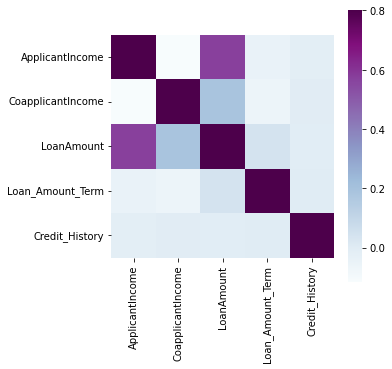

In [10]:
# Finding correlation between the variables
corr_matrix = loan.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap = "BuPu");

##### Data Transformation

In [11]:
# Checking for null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Imputing missing values using simple imputer and mean strategy
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
loan_n = loan.iloc[:, 8:11]
dependat =loan['Dependents']
dependat = dependat.replace('3+', 3)
loan_n1 = loan.iloc[:, 3:4]
imputer.fit(loan_n)
loan_n = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_n)

In [13]:
# Assigning the column names to the dataframe
loan['LoanAmount'],loan['Loan_Amount_Term'], loan['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]


In [14]:
# Imputing other null variables
employ = loan['Self_Employed']
P_area = loan['Property_Area']
gender = loan["Gender"]
status = loan["Married"]
education = loan["Education"]
loan_status = loan['Loan_Status']

status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

In [15]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
# Initializing string variables to be Encoded

input_class = ["Male", "Female"]
input_class1 = ["Yes", "No"]
input_class2 = ["Rural", "Urban", "Semiurban"]
input_class3 = ["Graduate", "Not Graduate"]
input_class4 = ["Y", "N"]

label_encoder.fit(input_class)

gender = gender.iloc[:].values
gender = list(gender)
gender = label_encoder.transform(gender)

label_encoder.fit(input_class1)

status = status.iloc[:].values
employ = employ.iloc[:].values
employ = list(employ)
status = list(status)
status = label_encoder.transform(status)
employ = label_encoder.transform(employ)

label_encoder.fit(input_class2)
P_area = P_area.iloc[:].values
P_area = list(P_area)
P_area = label_encoder.transform(P_area)

label_encoder.fit(input_class3)

education = education.iloc[:].values
education = list(education)
education = label_encoder.transform(education)

label_encoder.fit(input_class4)

loan_status = loan_status.iloc[:].values
loan_status =list(loan_status)
loan_status = label_encoder.transform(loan_status)


In [17]:
# Creating a new dataframe with the encoded variables
loan['Education'],loan['Self_Employed'],loan['Property_Area'],loan["Gender"],loan["Married"], loan['Loan_Status'], loan['Dependents'] =education, employ, P_area, gender, status, loan_status, dependat

In [18]:
# Writing the encoded dataframe to a csv file
loan.head()
loan.to_csv("Loan Processed data.csv")

In [19]:
# Creating a data and target for the model
data = loan.iloc[:, 1:-1]
target = loan.iloc[:, -1:]

In [20]:
# A quick look at data 
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [21]:
# A quick look at target
target.head(2)

,Loan_Status
0,1
1,0


In [22]:
# Write the data and target to csv files
data.to_csv("Data.csv")
target.to_csv("Target.csv")

##### **Training and testing the data with different machine learning models and compare their accuracies**


In [23]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=10)

##### Random Forest Classifier

In [24]:
model_a = RandomForestClassifier()
model_a.fit(x_train, y_train)
pred = model_a.predict(x_test)
forest = accuracy_score(y_test, pred)


c:\Users\vasan\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
c:\Users\vasan\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

##### KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
k = accuracy_score(y_test, pred)


c:\Users\vasan\anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


##### Naive Bayes classifier(MultinomialNB)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
MB= accuracy_score(y_test, pred)

##### Naive Bayes classifier(GaussianNB)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
GB=accuracy_score(y_test, pred)

##### Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

c:\Users\vasan\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


##### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

c:\Users\vasan\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [30]:
# Comparing the accuracy of the models
print("Random Forest Classifier: ", forest)
print("K Neighbors Classifier: ", k)
print("Multinomial Naive Bayes: ", MB)
print("Gaussian Naive Bayes: ", GB)
print("Logistic Regression: ", LR)
print("Decision Tree Classifier: ", DTC)


Random Forest Classifier:  0.7479674796747967
K Neighbors Classifier:  0.6097560975609756
Multinomial Naive Bayes:  0.5365853658536586
Gaussian Naive Bayes:  0.7804878048780488
Logistic Regression:  0.7967479674796748
Decision Tree Classifier:  0.7235772357723578


#### **Prediction Application using Pickle**

In [31]:
# import joblib to save the model
import joblib

In [32]:
# Saving the model
joblib.dump(model_a, "Loan_status.pkl")

['Loan_status.pkl']

In [33]:
# Get all values from the data
n= data.iloc[:,:].values

In [34]:
# Predicting the values
m = n[0]
m = np.array([m])

In [35]:
# Building the model to predict the values
model.predict(m)

array([1], dtype=int64)

<AxesSubplot:>

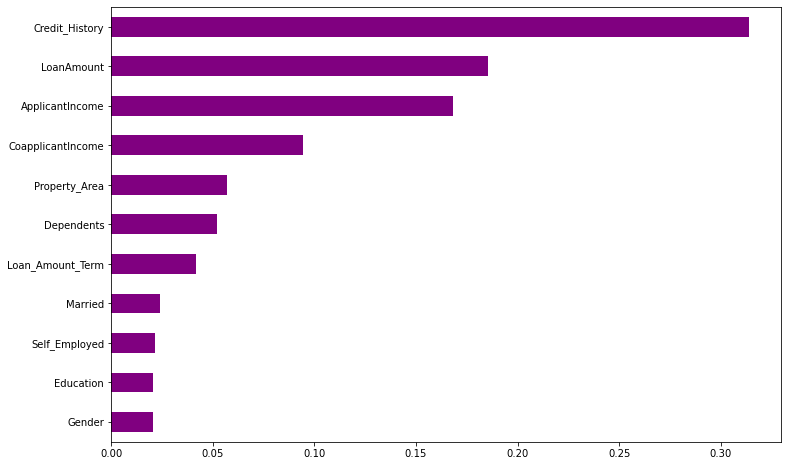

In [36]:
# Graphical representation of the feature importance in the model
importances=pd.Series(model_a.feature_importances_, index=data.columns) 
# sort feature importances from high to low
importances.sort_values(inplace=True)
importances.plot(kind='barh', figsize=(12,8), color='purple')